# Análisis Exploratorio de Datos (EDA) - Netflix

## `Diccionario de variables`

| **Columna** | **Descripción**                                                                                  |
| --------------- | ------------------------------------------------------------------------------------------------ |
| `show_id`       | Un identificador único para cada película o programa de TV.                                      |
| `type`          | Especifica si el contenido es una *Movie* o un *TV Show*.                                        |
| `title`         | El título o nombre del contenido.                                                                |
| `director`      | Nombre(s) del o los directores de la película o programa.                                        |
| `cast`          | Lista de actores que aparecen en el contenido.                                                   |
| `country`       | País de origen donde se produjo el contenido.                                                    |
| `date_added`    | La fecha en que el contenido fue añadido a Netflix.                                              |
| `release_year`  | El año en que el contenido fue lanzado originalmente.                                            |
| `rating`        | Clasificación de contenido (por ejemplo, TV-MA, PG-13) que indica su adecuación para el público. |
| `duration`      | Duración de las películas en minutos o el número de temporadas para programas de TV.             |
| `listed_in`     | Categorías o géneros a los que pertenece el contenido (por ejemplo, Drama, Comedia, Acción).     |
| `description`   | Un breve resumen o sinopsis del contenido.                                                       |

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

In [ ]:
# 1. Carga de datos
df = pd.read_csv("C:/Users/luigu/OneDrive/Escritorio/Proyecto ML - Netflix/data/netflix_titles.csv")
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
# 2. Descripción básica
print("Dimensiones del dataset:", df.shape)
print("\nTipos de datos:")
print(df.dtypes)
print("\nValores faltantes por columna:")
print(df.isnull().sum())

Dimensiones del dataset: (8807, 12)

Tipos de datos:
show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

Valores faltantes por columna:
show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64


In [ ]:
# 3. Estadísticas descriptivas
print("Estadísticas descriptivas de variables numéricas:")
print(df.describe())

print("\nConteo por tipo de contenido:")
print(df["type"].value_counts())

Estadísticas descriptivas de variables numéricas:
       release_year
count   8807.000000
mean    2014.180198
std        8.819312
min     1925.000000
25%     2013.000000
50%     2017.000000
75%     2019.000000
max     2021.000000

Conteo por tipo de contenido:
type
Movie      6131
TV Show    2676
Name: count, dtype: int64


## `Visualizaciones`

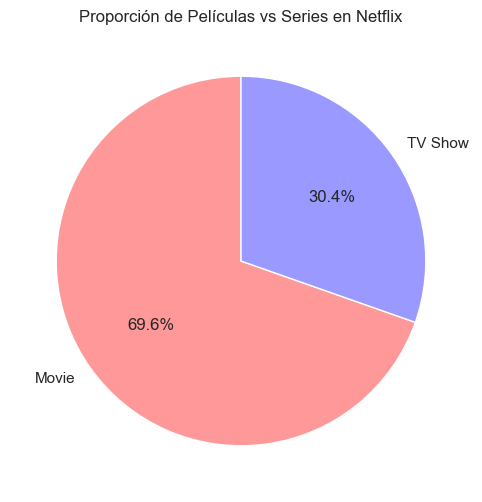

In [ ]:
# Pie Chart: proporción películas vs series
conteo_tipo = df["type"].value_counts()
plt.pie(conteo_tipo, labels=conteo_tipo.index, autopct='%1.1f%%', startangle=90, colors=["#FF9999", "#9999FF"])
plt.title("Proporción de Películas vs Series en Netflix")
plt.show()

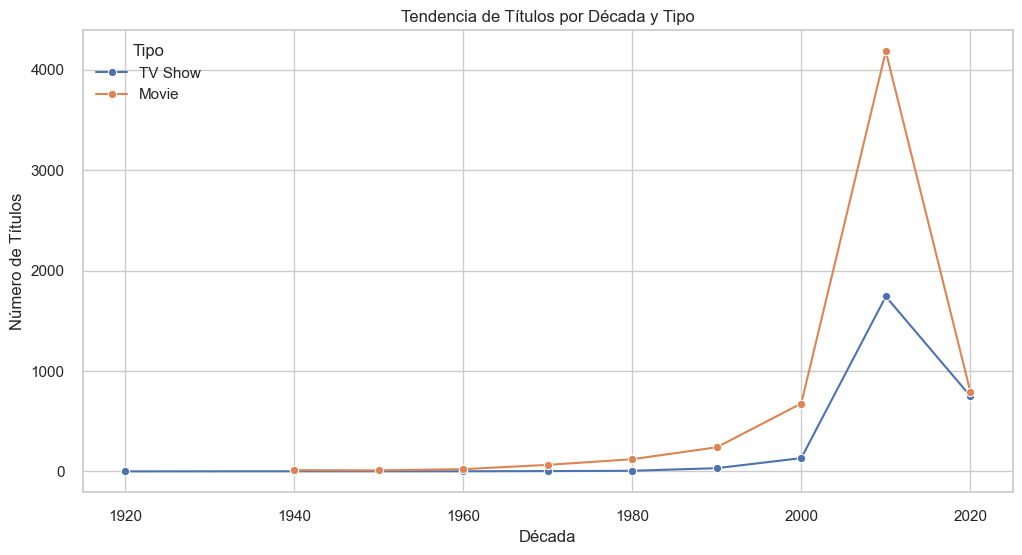

In [ ]:
# Línea temporal: títulos lanzados por década y tipo
df["decade"] = (df["release_year"] // 10) * 10
conteo_decada = df.groupby(["decade", "type"]).size().reset_index(name="count")

sns.lineplot(data=conteo_decada, x="decade", y="count", hue="type", marker="o")
plt.title("Tendencia de Títulos por Década y Tipo")
plt.xlabel("Década")
plt.ylabel("Número de Títulos")
plt.legend(title="Tipo")
plt.show()

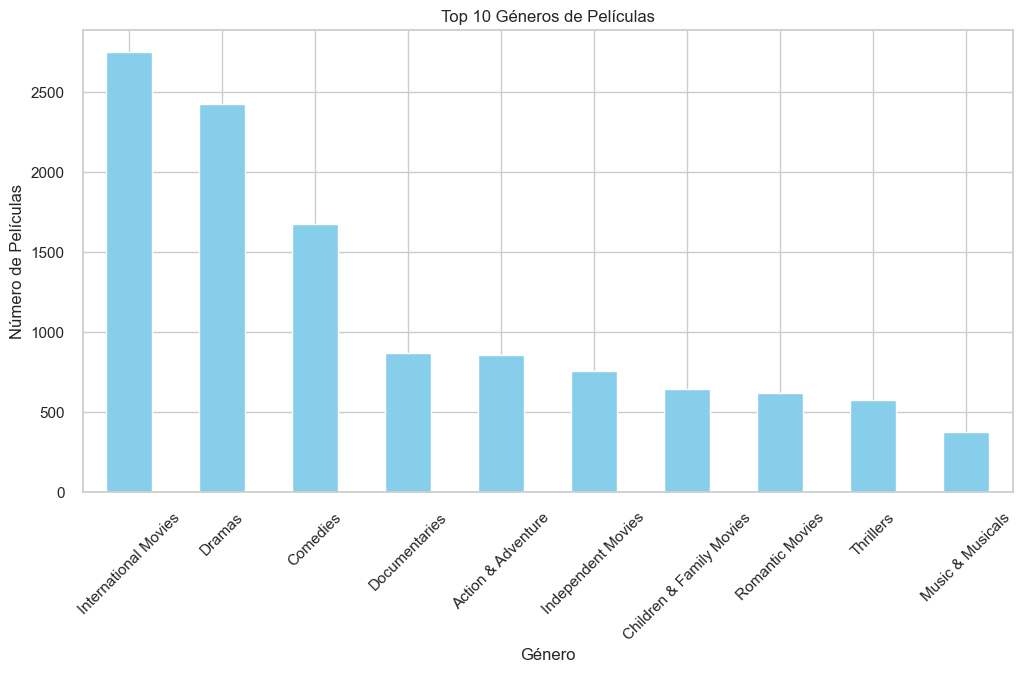

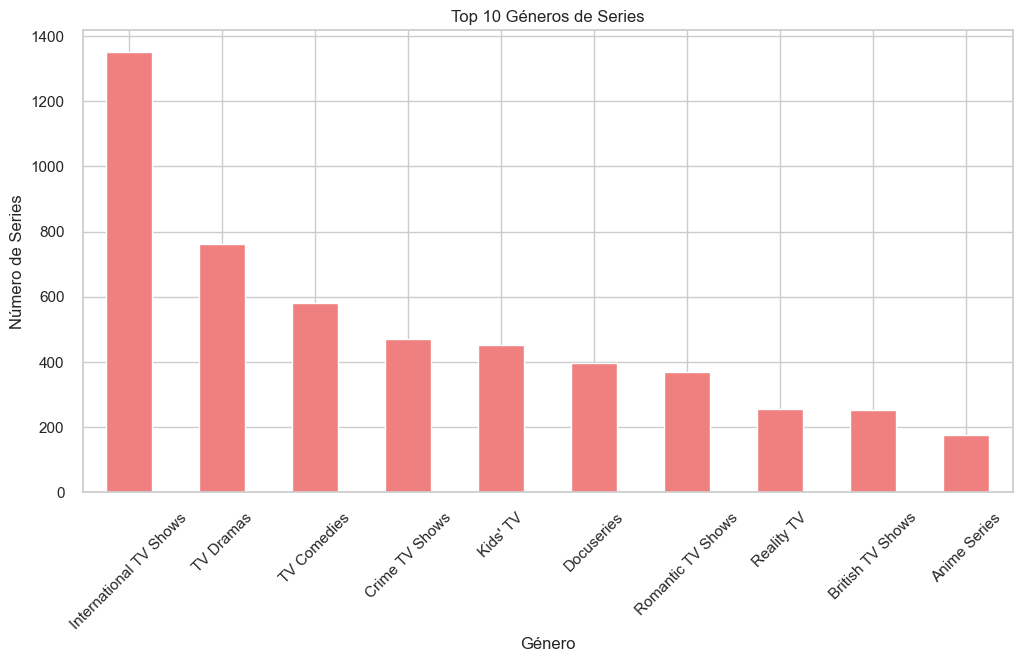

In [ ]:
# Top 10 géneros más frecuentes en películas
peliculas = df[df["type"] == "Movie"]
top_generos_peliculas = peliculas["listed_in"].str.split(", ", expand=True).stack().value_counts().head(10)

top_generos_peliculas.plot(kind="bar", color="skyblue")
plt.title("Top 10 Géneros de Películas")
plt.xlabel("Género")
plt.ylabel("Número de Películas")
plt.xticks(rotation=45)
plt.show()

# Top 10 géneros más frecuentes en series
series = df[df["type"] == "TV Show"]
top_generos_series = series["listed_in"].str.split(", ", expand=True).stack().value_counts().head(10)

top_generos_series.plot(kind="bar", color="lightcoral")
plt.title("Top 10 Géneros de Series")
plt.xlabel("Género")
plt.ylabel("Número de Series")
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Transformación de duration (peliculas) a minutos
df_movies = df[df["type"] == "Movie"].copy()
df_movies["duration_num"] = df_movies["duration"].str.replace(" min", "", regex=False).astype(float)

# Transformación de duration (series) a temporadas
df_shows = df[df["type"] == "TV Show"].copy()
df_shows["seasons_num"] = df_shows["duration"].str.replace(" Season", "", regex=False).str.replace("s", "", regex=False).astype(float)

print("Duración promedio de películas (min):", round(df_movies["duration_num"].mean(), 2))
print("Número promedio de temporadas en series:", round(df_shows["seasons_num"].mean(), 2))

Duración promedio de películas (min): 99.58
Número promedio de temporadas en series: 1.76


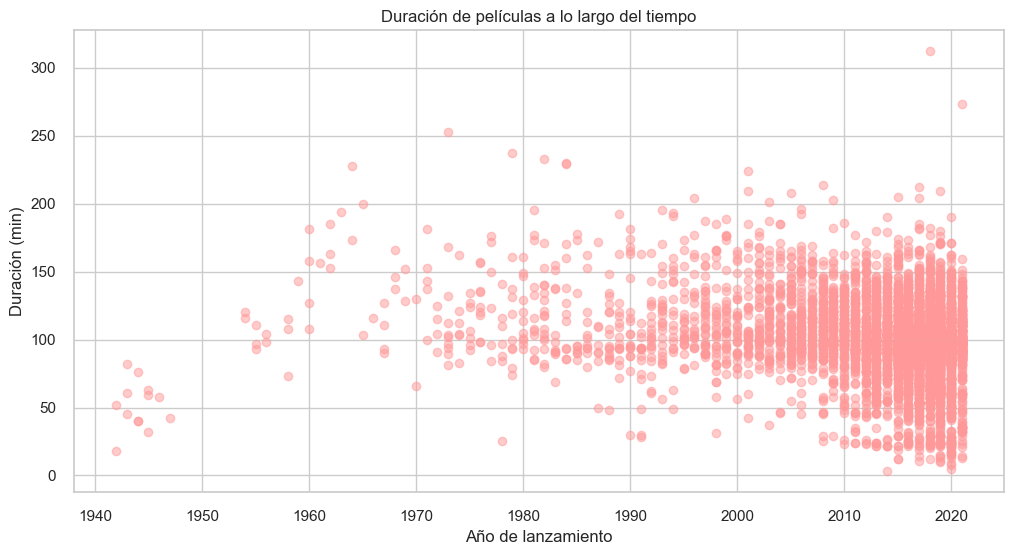

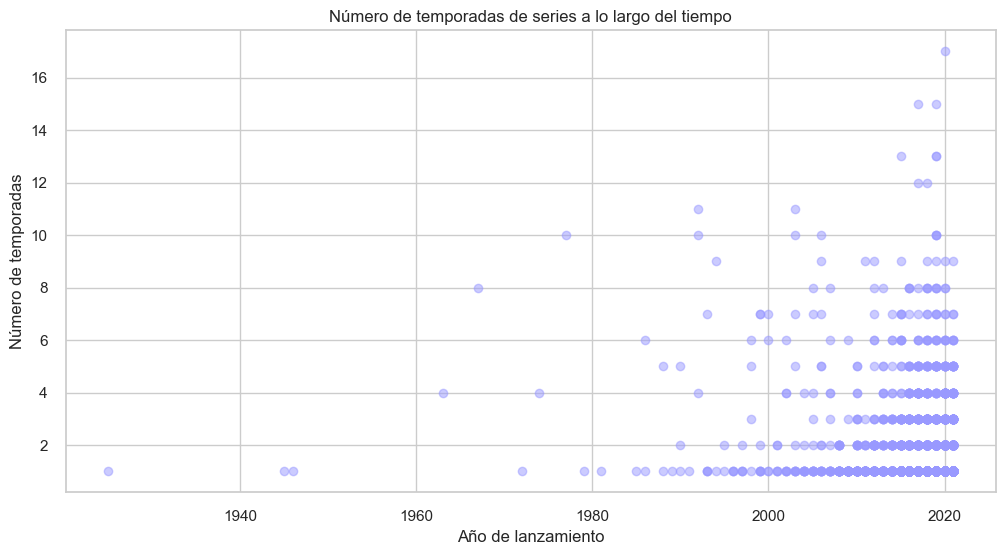

In [ ]:
# Dispersión: duración de películas por año
plt.scatter(df_movies["release_year"], df_movies["duration_num"], alpha=0.5, color="#FF9999")
plt.title("Duración de películas a lo largo del tiempo")
plt.xlabel("Año de lanzamiento")
plt.ylabel("Duración (min)")
plt.show()

# Dispersión: temporadas de series por año
plt.scatter(df_shows["release_year"], df_shows["seasons_num"], alpha=0.5, color="#9999FF")
plt.title("Número de temporadas de series a lo largo del tiempo")
plt.xlabel("Año de lanzamiento")
plt.ylabel("Número de temporadas")
plt.show()

## `Hallazgos iniciales`

In [20]:
print("1. El dataset contiene", df.shape[0], "títulos de Netflix.")
print("2. La mayoría del contenido en Netflix corresponde a películas, aunque las series tienen una participación creciente en los ultimos años.")
print("3. Al agrupar por décadas, se observa un crecimiento marcado en la producción de películas y series desde los 2000s, con un pico en la década de 2010.")
print("4. Los géneros más frecuentes en películas son de tipo dramático y comedia, mientras que en series predominan contenidos para niños/familia y dramas televisivos.")
print("5. Existen valores faltantes en columnas clave como 'director', 'cast' y 'country'.")
print("6. Desafíos: valores faltantes, sesgo hacia títulos recientes y categorías muy generales en géneros.")

1. El dataset contiene 8807 títulos de Netflix.
2. La mayoría del contenido en Netflix corresponde a películas, aunque las series tienen una participación creciente en los ultimos años.
3. Al agrupar por décadas, se observa un crecimiento marcado en la producción de películas y series desde los 2000s, con un pico en la década de 2010.
4. Los géneros más frecuentes en películas son de tipo dramático y comedia, mientras que en series predominan contenidos para niños/familia y dramas televisivos.
5. Existen valores faltantes en columnas clave como 'director', 'cast' y 'country'.
6. Desafíos: valores faltantes, sesgo hacia títulos recientes y categorías muy generales en géneros.
